In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("salaries 100k.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [28]:
df['salary_more_then_100k'].value_counts()

salary_more_then_100k
1    10
0     6
Name: count, dtype: int64

In [30]:
df.isna().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [32]:
df.job.nunique()

3

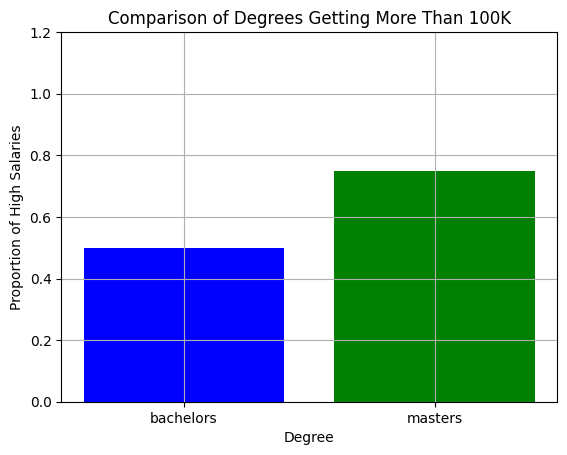

In [42]:
Education = df.groupby('degree')['salary_more_then_100k'].mean().reset_index()
plt.bar(Education['degree'],Education['salary_more_then_100k'],color = ['b','g'])
plt.title('Comparison of Degrees Getting More Than 100K')
plt.xlabel('Degree')
plt.ylabel('Proportion of High Salaries')
plt.ylim(0, 1.2)
plt.grid('True')

(0.0, 1.2)

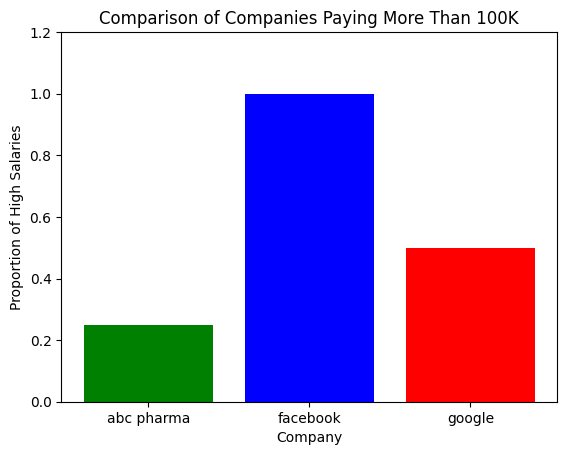

In [35]:
company_salary = df.groupby('company')['salary_more_then_100k'].mean().reset_index()

# --- Step 3: Create bar chart ---
plt.bar(company_salary['company'], company_salary['salary_more_then_100k'], color=['green', 'blue', 'red'])

# --- Step 4: Add labels and title ---
plt.title('Comparison of Companies Paying More Than 100K')
plt.xlabel('Company')
plt.ylabel('Proportion of High Salaries')
plt.ylim(0, 1.2)


<BarContainer object of 16 artists>

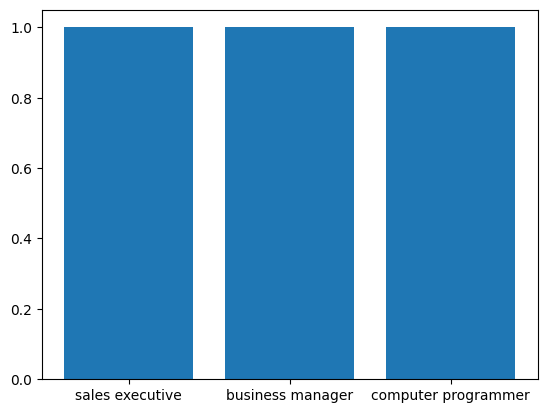

In [33]:
plt.bar(df.job,df.salary_more_then_100k)

In [3]:
x = df.drop(['salary_more_then_100k'],axis = 1)
y = df['salary_more_then_100k']


In [4]:
from sklearn.preprocessing import LabelEncoder
l_company = LabelEncoder()
l_job = LabelEncoder()
l_degree = LabelEncoder()

In [5]:
x['company_n'] = l_company.fit_transform(x['company'])
x['jobs_n'] = l_company.fit_transform(x['job'])
x['degree_n'] = l_company.fit_transform(x['degree'])

In [6]:
x

,company,job,degree,company_n,jobs_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [7]:
X = x.drop(['company','job','degree'],axis='columns')
X


,company_n,jobs_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [23]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
y_pred = model.predict(x_test)
y_pred

array([0, 1])

In [15]:
y_T

15    1
9     1
Name: salary_more_then_100k, dtype: int64

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dell\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize